In [1]:
%matplotlib notebook
%reload_ext autoreload
%autoreload 2

import sys
import os

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams.update({'figure.max_open_warning': 0})

In [2]:
sys.path.append('../')
from vis.plotting.utils import resize_by_tradeoff, color_by_dist, color_by_cv, enhance_color

def load_props(path):
    r"""
    Load CV, Mu, Ik and S from path.
    """
    CV = None
    cvpathf = os.path.join(path, "datacv.csv")
    if os.path.exists(cvpathf):
        CV = np.loadtxt(cvpathf)

    # load the Mu values
    Mu = None
    mupathf = os.path.join(path, "mu.csv")
    if os.path.exists(mupathf):
        Mu = np.loadtxt(mupathf)

    # load the knee indices
    Ik = None
    kpathf = os.path.join(path, "muid.csv")
    if os.path.exists(kpathf):
        Ik = np.loadtxt(kpathf, dtype=int)
        
    return CV, Mu, Ik

def decide_size_color(CV, Mu, Ik):
    r"""
    Decide point-size and color from `CV`, `Mu` and `Ik`
    """
    # decide point-size
    S = 1
    if Mu is not None and Ik is not None:
        S = resize_by_tradeoff(Mu, k=Ik)

    # decide colors
    # C = default_color(F.shape[0], alpha=0.5)
    M = np.mean(F, axis=0)
    C,_ = color_by_dist(F, M)
    
    # if CV is available, use CV to color
    if CV is not None:
        C = color_by_cv(CV)

    # enhance knee points
    if Ik is not None:
        C = enhance_color(C, Ik)
    return S, C

../data/cdebmdk-nbi/8d/dataf.csv (3380, 8) ['..', 'data', 'cdebmdk-nbi', '8d'] cdebmdk-nbi
../data/cdebmdk-nbi/8d/dataf.csv (3380, 7) ['..', 'data', 'cdebmdk-nbi', '8d'] cdebmdk-nbi


<IPython.core.display.Javascript object>


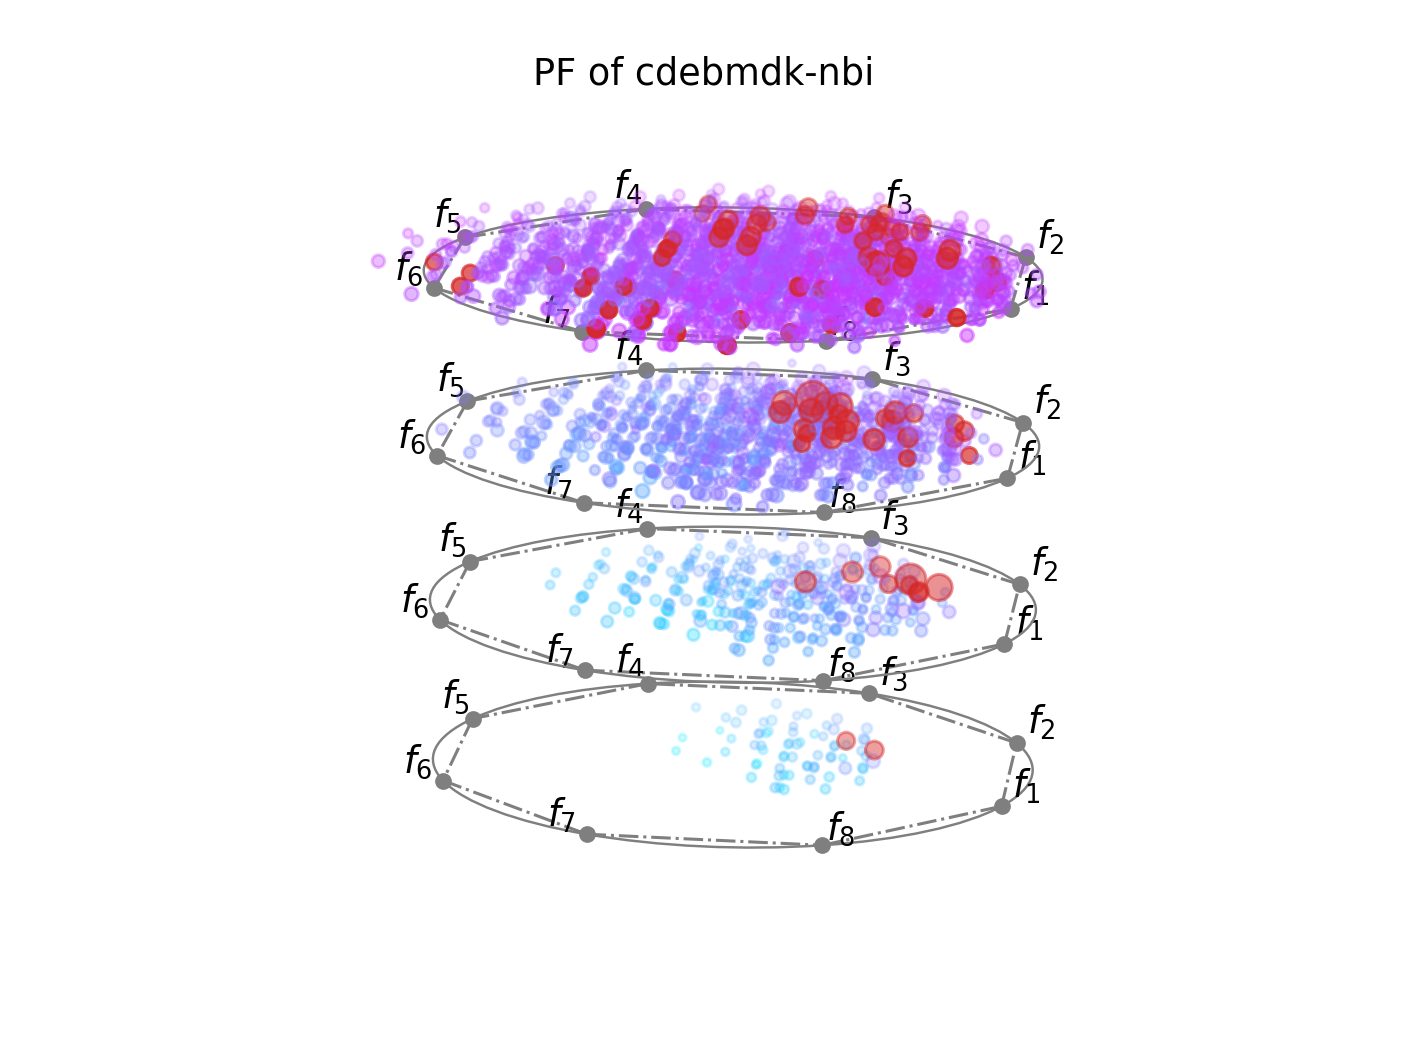

Plotting palette-star-viz.
Loading depth contours from ../data/cdebmdk-nbi/8d/depth-cont-cvhull.csv.


<IPython.core.display.Javascript object>


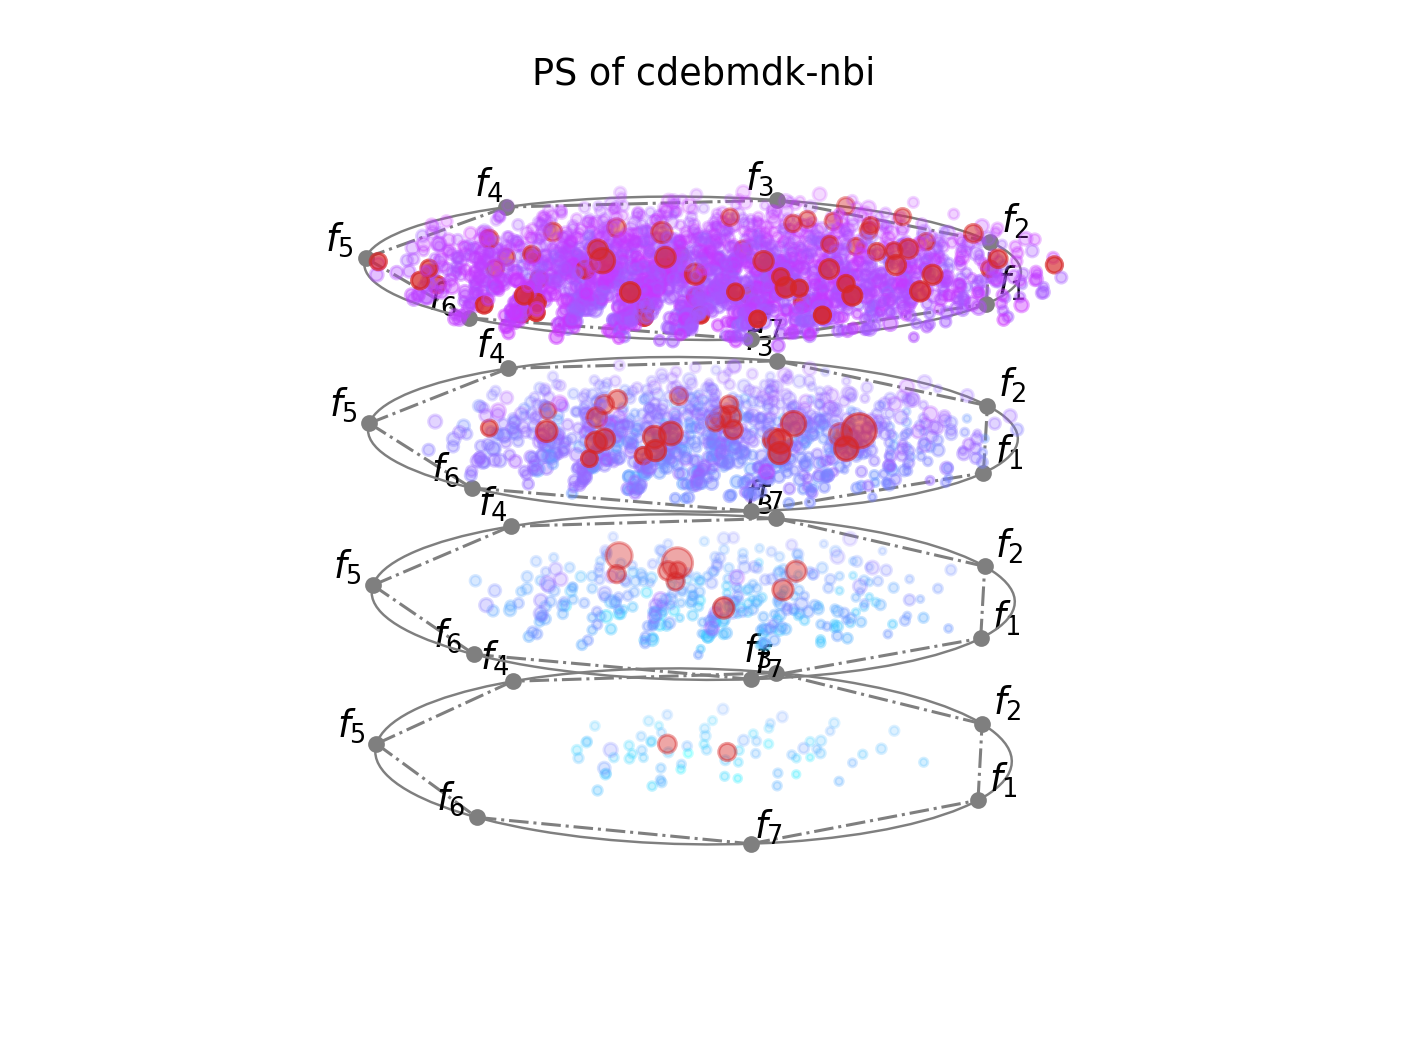

Plotting palette-star-viz.
Loading depth contours from ../data/cdebmdk-nbi/8d/depth-cont-cvhull.csv.


In [3]:
# %matplotlib inline
sys.path.append('../')
from vis.plotting import paletteviz
from vis.plotting.paletteviz import camera_angles_star

pfs = {'dtlz2': ['3d', '4d', '8d'], \
       'dtlz2-nbi': ['3d', '4d', '8d'], \
       'debmdk': ['3d', '4d', '8d'], \
       'debmdk-nbi': ['3d', '4d', '8d'], \
       'debmdk-all': ['3d', '4d', '8d'], \
       'debmdk-all-nbi': ['3d', '4d', '8d'], \
       'dtlz8': ['3d', '4d', '6d', '8d'], \
       'dtlz8-nbi': ['3d', '4d', '6d', '8d'], \
       'c2dtlz2': ['3d', '4d', '5d', '8d'], \
       'c2dtlz2-nbi': ['3d', '4d', '5d', '8d'], \
       'cdebmdk': ['3d', '4d', '8d'], \
       'cdebmdk-nbi': ['3d', '4d', '8d'], \
       'c0dtlz2': ['3d', '4d', '8d'], \
       'c0dtlz2-nbi': ['3d', '4d', '8d'], \
       'crash-nbi': ['3d'], 'crash-c1-nbi': ['3d'], 'crash-c2-nbi': ['3d'], \
       'gaa': ['10d'], \
       'gaa-nbi': ['10d']}

pf, dim = 'cdebmdk-nbi', '8d'

fullpathf = "../data/{0:s}/{1:s}/dataf.csv".format(pf, dim)
fullpathx = "../data/{0:s}/{1:s}/datax.csv".format(pf, dim)

if os.path.exists(fullpathf):
    path, filenamef = os.path.split(fullpathf)
    dirs = path.split('/')
    frontname = dirs[-2]

    # load the front
    F = np.loadtxt(fullpathf, delimiter=',')
    print(fullpathf, F.shape, dirs, frontname)
    
    # load design variables
    X = np.loadtxt(fullpathx, delimiter=',')
    print(fullpathf, X.shape, dirs, frontname)
    
    # depth contour path
    depth_contour_path = os.path.join(path, "depth-cont-cvhull.csv")

    CV, Mu, Ik = load_props(path)
    S,C = decide_size_color(CV, Mu, Ik)

    # with plt.rc_context({"text.usetex": True, "font.size": 12}):
    paletteviz.plot(F, ax=Axes3D(plt.figure()), depth_contours=depth_contour_path, mode='star', \
                    n_partitions=4, s=S, c=C, verbose=True, euler=camera_angles_star[pf][dim], \
                    title="PF of {:s}".format(frontname))
    
    # with plt.rc_context({"text.usetex": True, "font.size": 12}):
    paletteviz.plot(X, ax=Axes3D(plt.figure()), depth_contours=depth_contour_path, mode='star', \
                    n_partitions=4, s=S, c=C, verbose=True, euler=camera_angles_star[pf][dim], \
                   title="PS of {:s}".format(frontname))

In [9]:
from vis.utils import transform as tr

def find_wpo(X, F, Mu, I_lt, verbose=False):
    # Choose a feasible starting point x0
    Ix0 = 2113 # np.random.randint(F.shape[0])
    if verbose:
        print("Ix0 =", Ix0)
    # calculate its weakly pareto-optinal counterpart
    # with I_lt
    fh = F[Ix0]
    Iwpo = np.argwhere(np.all(F[:,I_lt] <= fh[I_lt], axis=1))
    Ip = tr.pfindices(F[Iwpo, I_lt])
    # since Ip.shape[0] > 1, we pick the one with the highest tradeoff
    ImaxMu = Ip[np.argmax(Mu[Ip])]
    # return the index
    return ImaxMu

def find_p_criterion()

def solveEq3_1(h, X, F, Mu, CV, params, verbose=False):
    (I_lt, I_le, z, I_eq, I_gt, e, I_fr, w) = params
    print(params)
    
    I_lt = np.array(I_lt).astype(int)
    I_le = np.array(I_le).astype(int)
    z = np.array(z).astype(float)
    I_eq = np.array(I_eq).astype(int)
    I_gt = np.array(I_gt).astype(int)
    e = np.array(e).astype(float)
    I_fr = np.array(I_fr).astype(int)
    w = np.array(w).astype(float)
    
    # solution xh
    xh = X[h]
    fh = F[h]
    
    # indices that satisfy the first constraint
    Ic1 = np.argwhere(np.all(F[:,I_eq] <= fh[I_eq], axis=1))
    if verbose:
        print("Ic1.shape =", Ic1.shape, "\nIc1 =", Ic1)
    assert Ic1.shape[0] > 0, "Ic1 shouldn't be empty."
    
    # indices that satisfy the second constraint
    Ic2 = np.argwhere(np.all(F[:,I_gt] <= e, axis=1))
    if verbose:
        print("Ic2.shape =", Ic2.shape, "\nIc2 =", Ic2)
    assert Ic2.shape[0] > 0, "Ic2 shouldn't be empty."
    
    # indices that satisfy both constraints
    Ic = np.intersect1d(Ic1, Ic2)
    Ic = np.reshape(Ic, (Ic.shape[0], 1))
    if verbose:
        print("Ic.shape =", Ic.shape, "\nIc =", Ic)
    assert Ic.shape[0] > 0, "Ic shouldn't be empty."
    
    # indices that evaluates the second objective
    iz = I_le - I_le[0]
    f2 = (F[Ic,I_le] / w[I_le]) - z[iz]
    if verbose:
        print("f2.shape =", f2.shape, "\nf2 =\n", f2)
    assert f2.shape[0] > 0, "f2 shouldn't be empty."
        
    # evaluate the second objective
    f2gtz = f2[np.all(f2 > 0, axis=1)]
    if verbose:
        print("f2gtz.shape =", f2gtz.shape, "\nf2gtz =\n", f2gtz)
    assert f2gtz.shape[0] > 0, "f2gtz shouldn't be empty."

    # make second objective function values negative
    # and find the indices of PF solutions
    f2gtzi = f2gtz * -1
    If2p = Ic[tr.pfindices(f2gtzi)]
    if verbose:
        print("If2p =", If2p)
    assert If2p.shape[0] > 0, "If2p shouldn't be empty."
    
    # evaluate the first objective
    f1 = F[Ic,I_lt] / w[I_lt]
    if verbose:
        print("f1 =", f1)
    assert f1.shape[0] > 0, "If shouldn't be empty."
        
    # find the indices of first objective PF solutions
    If1p = Ic[tr.pfindices(f1)]
    if verbose:
        print("If1p =", If1p)
    assert If1p.shape[0] > 0, "If1p shouldn't be empty."
    
    # merge two PF indices
    Ifp = np.vstack((If1p, If2p))
    if verbose:
        print("Ifp =", Ifp)
    assert Ifp.shape[0] > 0, "Ifp shouldn't be empty."
    
    # Find a single solution with highest tradeoff
    ImaxMu = None
    ImaxMu = np.argmax(Mu[Ifp])
    if verbose:
        print("ImaxMu =", ImaxMu)
    assert ImaxMu is not None, "ImaxMu shouldn't be \'None\'."
        
    # find the index of the solution with the highest tradeoff
    If = None
    If = Ifp[ImaxMu][0]
    if verbose:
        print("If =", If)
    assert If is not None, "If shouldn't be \'None\'."
    
    # retrun the index of the higest tradeoff vector
    return If

def nimbus(X, F, Mu, CV, params, verbose=False):
    # normalize the points within [0,1]
    F_ = tr.normalize(F, lb=np.zeros(F.shape[1]), ub=np.ones(F.shape[1]))
    i = 0
    # set h to 1
    h = 1
    # do step 1
    Ixh = find_wpo(X, F, Mu, params[i][0], verbose=verbose)
    # do step 2 and 3
    Ixh_ = solveEq3_1(Ixh, X, F_, Mu, CV, params[i], verbose=verbose)
    if Ixh == Ixh_:
        # get new params and go to step 2
        Ixh_ = solveEq3_1(Ixh, X, F_, Mu, CV, params[i+1], verbose=verbose)
    else:
        # go to step 9
        pass
    # show f(xh) and f(xh_) to DM
    fxh = F[Ixh]
    fxh_= F[Ixh_]
    # if decition maker wants different alternative
    # dh = X[Ixh_] - X[Ixh] and go to step 6
    # if decision maker prefers f(xh)
    # xh+1 = xh and go to step 2
    Ixh_ = solveEq3_1(Ixh_, X, F_, Mu, CV, params[i], verbose=verbose)
    # else
    
    return Ixh_

np.random.seed(123456)

# this settings give optinal solution at index 3224
I_lt = [0,1,2]
I_le = [2,3]
z = [0.5, 0.25]
w = [0.3, 0.3, 0.2, 0.2]
I_eq = [3,4]
I_gt = [5,6]
e = [0.5, 0.5]
I_fr = [7]
params1 = (I_lt, I_le, z, I_eq, I_gt, e, I_fr, w)

# this settings give optinal solution at index 3342
I_lt = [0,1]
I_le = [2,3]
z = [0.25, 0.25, 0.25]
w = [0.1, 0.2, 0.3, 0.4]
I_eq = [4,5]
I_gt = [7]
e = [0.75]
I_fr = [6]
params2 = (I_lt, I_le, z, I_eq, I_gt, e, I_fr, w)

# this settings give optinal solution at index 1943
I_lt = [0]
I_le = [1,2,3]
z = [0.5, 0.5, 0.5]
w = [0.4, 0.3, 0.2, 0.1]
I_eq = [6,7]
I_gt = [4]
e = [0.75]
I_fr = [5]
params3 = (I_lt, I_le, z, I_eq, I_gt, e, I_fr, w)

params = (params1, params2, params3)

If = nimbus(X, F, Mu, CV, params, verbose=True)
print(If)

Ix0 = 2113
([0], [1, 2, 3], [0.5, 0.5, 0.5], [6, 7], [4], [0.75], [5], [0.4, 0.3, 0.2, 0.1])
Ic1.shape = (572, 1) 
Ic1 = [[  20]
 [  30]
 [  32]
 [  39]
 [  44]
 [  46]
 [  47]
 [  48]
 [  54]
 [  62]
 [  67]
 [  69]
 [  70]
 [  73]
 [  76]
 [  77]
 [  78]
 [  79]
 [  80]
 [  81]
 [  82]
 [  83]
 [  84]
 [  85]
 [  86]
 [  87]
 [  88]
 [  89]
 [  90]
 [ 385]
 [ 386]
 [ 387]
 [ 388]
 [ 389]
 [ 390]
 [ 391]
 [ 392]
 [ 393]
 [ 394]
 [ 395]
 [ 396]
 [ 397]
 [ 398]
 [ 399]
 [ 400]
 [ 401]
 [ 402]
 [ 403]
 [ 404]
 [ 405]
 [ 406]
 [ 407]
 [ 408]
 [ 409]
 [ 410]
 [ 411]
 [ 412]
 [ 413]
 [ 414]
 [ 415]
 [ 416]
 [ 417]
 [ 418]
 [ 419]
 [ 420]
 [ 421]
 [ 422]
 [ 423]
 [ 424]
 [ 425]
 [ 426]
 [ 427]
 [ 428]
 [ 429]
 [ 430]
 [ 431]
 [ 432]
 [ 433]
 [ 434]
 [ 435]
 [ 436]
 [ 437]
 [ 438]
 [ 439]
 [ 440]
 [ 441]
 [ 442]
 [ 443]
 [ 446]
 [ 463]
 [ 467]
 [ 468]
 [ 469]
 [ 478]
 [ 485]
 [ 487]
 [ 488]
 [ 489]
 [ 490]
 [ 491]
 [ 494]
 [ 498]
 [ 500]
 [ 501]
 [ 502]
 [ 503]
 [ 504]
 [ 516]
 [ 520]
 [ 521]